### Per-country incidence of infection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
cases = pd.read_csv("corona.csv")

In [3]:
world_population = pd.read_csv("world_population.csv")

In [4]:
print(world_population.columns)
world_population.dtypes

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')


Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2016              float64
2017              float64
2018              float64
2019              float64
Unnamed: 64       float64
Length: 65, dtype: object

In [5]:
print(cases.columns)
print(cases.dtypes)

Index(['Country', 'Cases', 'Deaths', 'Continent'], dtype='object')
Country      object
Cases         int64
Deaths        int64
Continent    object
dtype: object


In [6]:
world_population.loc[world_population["Country Code"] == "RUS", \
                     "Country Name"]="Russia"

In [7]:
world_population.loc[world_population["Country Code"] == "KOR", \
                     "Country Name"]="South Korea"

In [8]:
world_population.loc[world_population["Country Code"] == "HKG", \
                     "Country Name"]="Hong Kong"

In [9]:
m = pd.merge(cases, world_population[["Country Name","2018"]], how='left', left_on=['Country'], \
             right_on=['Country Name'])

In [10]:
m = m.rename(columns={"2018": "Population"})

In [11]:
m

,Country,Cases,Deaths,Continent,Country Name,Population
0,Japan,45,0,Asia,Japan,1.265291e+08
1,Singapore,28,0,Asia,Singapore,5.638676e+06
2,Thailand,25,0,Asia,Thailand,6.942852e+07
3,South Korea,23,0,Asia,South Korea,5.163526e+07
4,Hong Kong,22,1,Asia,Hong Kong,7.451000e+06
5,Australia,15,0,Australia/Oceania,Australia,2.499237e+07
6,Malaysia,14,0,Asia,Malaysia,3.152858e+07
7,Taiwan,13,0,Asia,Taiwan,2.378045e+07
8,United States,12,0,North America,United States,3.271674e+08
9,Germany,12,0,Europe,Germany,8.292792e+07


In [12]:
per_capita = pd.concat([m["Country"], m["Cases"]/m["Population"]], \
                       axis=1, keys=["Country", "Cases per capita"])

In [13]:
pcs = per_capita.sort_values("Cases per capita", ascending=True)

<BarContainer object of 19 artists>

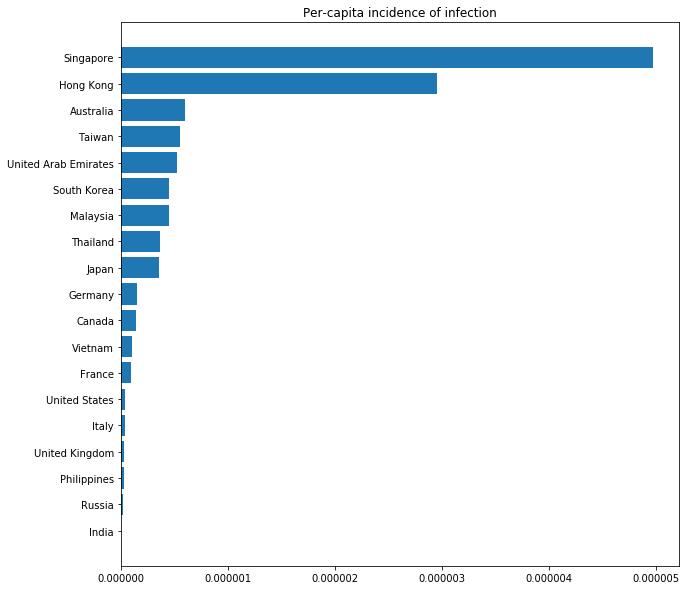

In [14]:
plt.figure(figsize=(10,10))
plt.title("Per-capita incidence of infection")
plt.barh(pcs["Country"], pcs["Cases per capita"])

### Infections per square mile

In [112]:
countries = pd.read_csv("countries_ex.csv", decimal=",")

In [113]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [114]:
countries.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [115]:
countries.loc[countries["Country"] == "Korea, South", \
                     "Country"]="South Korea"

In [116]:
m2 = pd.merge(cases, countries[["Country","Area (sq. mi.)"]], how='left', left_on=['Country'], \
             right_on=['Country'])

In [117]:
m2

,Country,Cases,Deaths,Continent,Area (sq. mi.)
0,Japan,45,0,Asia,377835
1,Singapore,28,0,Asia,693
2,Thailand,25,0,Asia,514000
3,South Korea,23,0,Asia,98480
4,Hong Kong,22,1,Asia,1092
5,Australia,15,0,Australia/Oceania,7686850
6,Malaysia,14,0,Asia,329750
7,Taiwan,13,0,Asia,35980
8,United States,12,0,North America,9631420
9,Germany,12,0,Europe,357021


In [118]:
per_sq_mi = pd.concat([m2["Country"], m2["Cases"]/m2["Area (sq. mi.)"]], \
                       axis=1, keys=["Country", "Cases per sq. mi"])

In [119]:
psm = per_sq_mi.sort_values("Cases per sq. mi", ascending=True)

<BarContainer object of 19 artists>

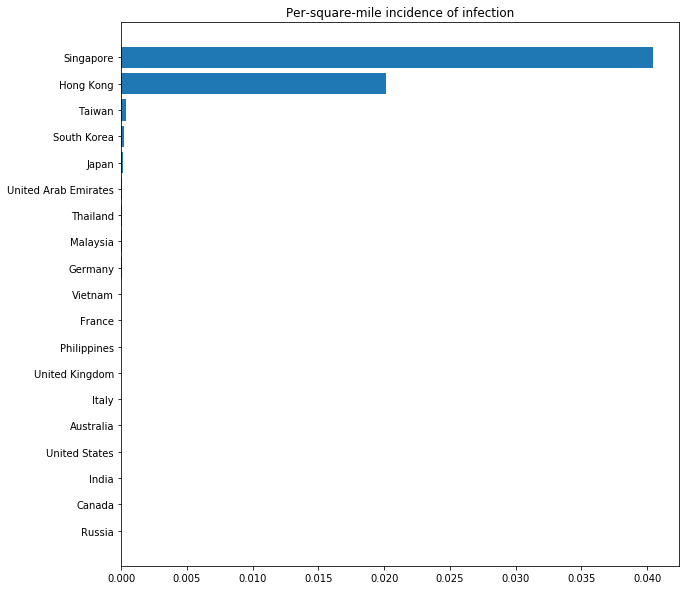

In [120]:
plt.figure(figsize=(10,10))
plt.title("Per-square-mile incidence of infection")
plt.barh(psm["Country"], psm["Cases per sq. mi"])

### Correlation between population density and incidence of infection

In [121]:
m3 = pd.merge(cases, countries[["Country","Pop. Density (per sq. mi.)"]], how='left', left_on=['Country'], \
             right_on=['Country'])

In [122]:
m3

,Country,Cases,Deaths,Continent,Pop. Density (per sq. mi.)
0,Japan,45,0,Asia,337.4
1,Singapore,28,0,Asia,6482.2
2,Thailand,25,0,Asia,125.7
3,South Korea,23,0,Asia,496.0
4,Hong Kong,22,1,Asia,6355.7
5,Australia,15,0,Australia/Oceania,2.6
6,Malaysia,14,0,Asia,74.0
7,Taiwan,13,0,Asia,640.3
8,United States,12,0,North America,31.0
9,Germany,12,0,Europe,230.9


In [150]:
m3["Pop. Density (per sq. mi.)"] = m3["Pop. Density (per sq. mi.)"].astype(float)

In [151]:
per_pop_dens = pd.concat([m3["Country"], per_capita["Cases per capita"], m3["Pop. Density (per sq. mi.)"]], \
                         axis=1, keys=["Country", "Cases per capita", "Pop. Density (per sq. mi.)"])

In [177]:
y = per_pop_dens["Cases per capita"].values
x = per_pop_dens["Pop. Density (per sq. mi.)"].values

In [178]:
x.sort()
y.sort()
import numpy as np
x = np.log(x)
y = np.log(y)

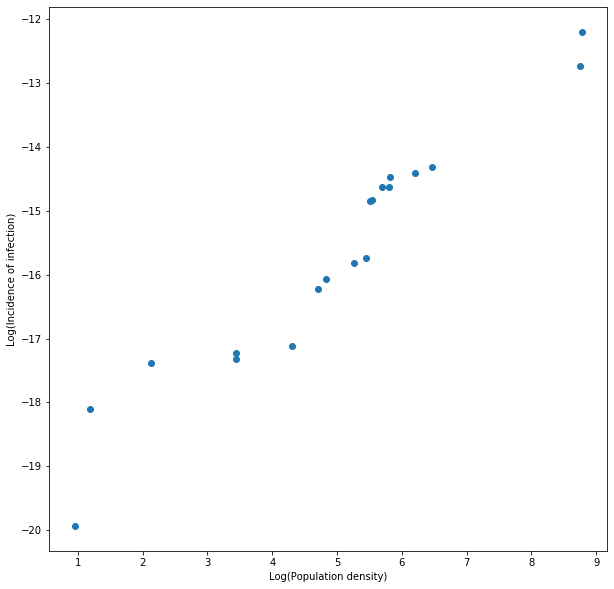

In [180]:
plt.figure(figsize=(10, 10))
plt.ylabel("Log(Incidence of infection)")
plt.xlabel("Log(Population density)")
plt.scatter(x,y)